# <center>Análise Exploratória de Dados</center>

## Sumário

   1. <b>[Introdução](#1)</b> <a id=18></a>
       - 1.1 <b>[Descrição das Variáveis](#2)</b>
       - 1.2 <b>[Objetivo](#3)</b>
   2. <b>[Preparação](#4)</b>
       - 2.1 <b>[Importando as bibliotecas](#5)</b>
       - 2.2 <b>[Carregando a base dados](#6)</b>
   3. <b>[Exploração e Análise dos Dados](#8)</b>
       - 3.1 <b>[Análise Univariada](#9)</b>
       - 3.2 <b>[Análise Bivariada](#10)</b>
   4. <b>[Conclusões da Análise Exploratória](#11)</b>

-----------------------------------------------------

## 1. Introdução<a id=1></a>
[back to top](#18)

### 1.1 Descrição das Variáveis<a id=2></a>

`age` - Idade do paciente

`sex` - Sexo do paciente

`cp` - Tipo de dor no peito ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Assintomático

`trtbps` - Pressão arterial de repouso (em mm Hg)

`chol` - Colesterol em mg/dl buscado através do sensor de IMC

`fbs` - (Açúcar no sangue em jejum > 120 mg/dl) ~ 1 = Verdadeiro, 0 = Falso

`restecg` - Resultados eletrocardiográficos em repouso ~ 0 = Normal, 1 = Normalidade da onda ST-T, 2 = Hipertrofia ventricular esquerda

`thalachh`  - Frequência cardíaca máxima atingida

`oldpeak` - Pico anterior

`slp` - Inclinação

`caa` - Número de principais vasos sanguíneos

`thall` - Resultado do teste de estresse de Thalium ~ (0,3)

`exng` - Angina induzida por exercício ~ 1 = Sim, 0 = Não

`output` - Variável Resposta

### 1.2 Objetivo <a id=3></a>

<p>O Brasil é um país que sofre severamente com doenças cardiovasculares. De acordo com o Ministério da Saúde cerca de 300 mil indivíduos por ano sofrem Infarto Agudo no Miocárdio(IAM), ocorrendo óbito em 30% desses casos. Estima-se que até 2040 haverá aumento de até 250% desses eventos no país.</p>

<p>A partir de uma exploração e análise de dados(EDA) do conjunto de dados de Doenças Cardiácas, obter insights e prever se uma pessoa é propensa a um ataque cardiáco ou não.</p> 

-----------------------------------------------------

## 2. Preparação <a id=4></a>
[back to top](#18)

### 2.1 Importando as bibliotecas <a id=5></a>

In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 2.2 Carregando a base de dados <a id=6></a>

In [9]:
data_heart = pd.read_csv('heart.csv')

#### 2.2.1 Tamanho da base de dados

In [10]:
linhas, colunas = data_heart.shape
print(f'O número de linhas é de: {linhas}')
print(f'O número de colunas é de: {colunas}')

O número de linhas é de: 303
O número de colunas é de: 14


#### 2.2.2 Visualizando as primeiras 5 linhas do conjunto de dados

In [11]:
data_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### 2.2.3 Verificando o número de valores únicos em cada coluna

In [18]:
dict = {}

for i in list(data_heart.columns):
    dict[i] = data_heart[i].value_counts().shape[0]

pd.DataFrame(dict, index=['valores_unicos']).transpose()

,valores_unicos
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


#### 2.2.4 Separando as colunas Categóricas e Contínuas

In [24]:
cat_col = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
con_col = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
resposta = ['output']

print(f'As variáveis Categóricas são : {cat_col}')
print(f'As variáveis Contínuas são : {con_col}')
print(f'A variávels Resposta é: {resposta}')

As variáveis Categóricas são : ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
As variáveis Contínuas são : ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
A variávels Resposta é: ['output']


#### 2.2.5 Descrevendo os dados das colunas Contínuas

In [27]:
data_heart[con_col].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


#### 2.2.6 Verificando Valores Nulos

In [30]:
data_heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## 3. Exploração e Análise dos Dados <a id=8></a>
[back to top](#18)

### 3.1 Análise Univariada<a id=9></a>

#### 3.1.1 Contagem das Variáveis Categóricas

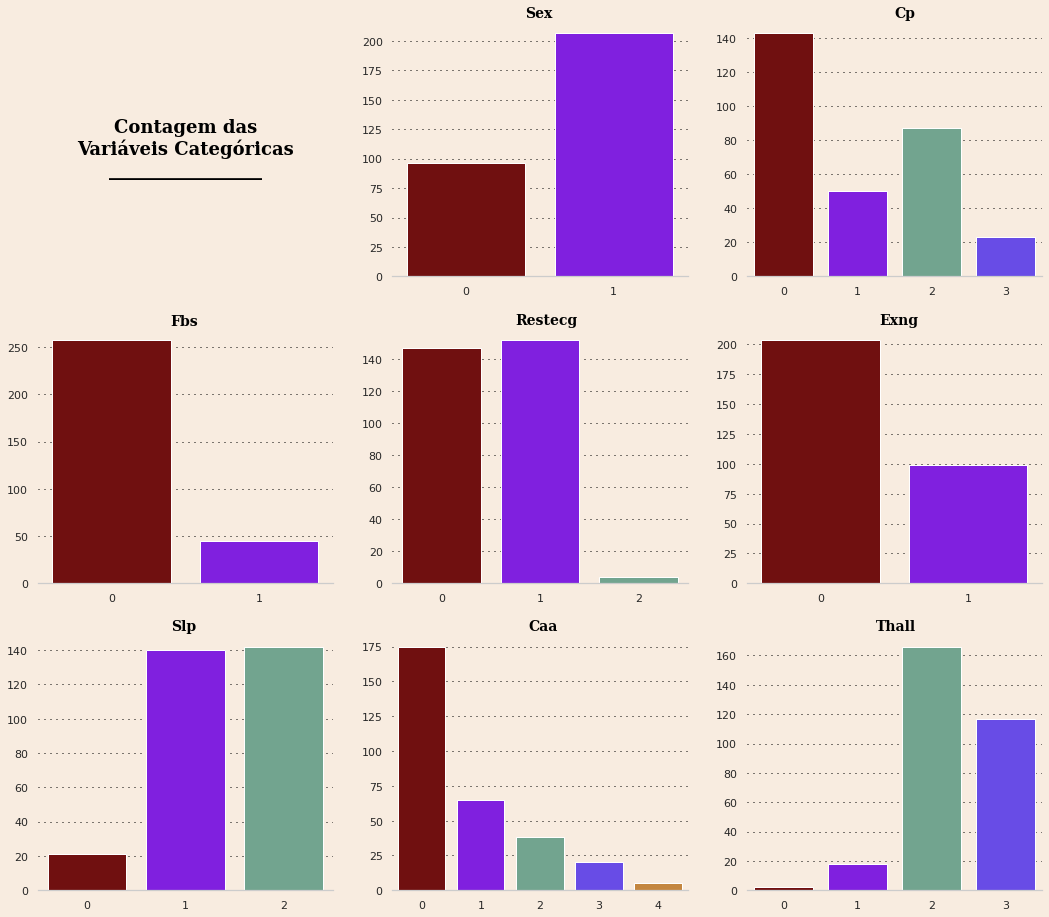

In [264]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(3,3)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]

background_color = '#F8ECE0'
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color) 


ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Contagem das\nVariáveis Categóricas\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

ax0.grid()

# Sex count
ax1.text(0.4, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=data_heart,x='sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# CP count
ax2.text(1.5, 152, 'Cp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=data_heart,x='cp',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Fbs count
ax3.text(0.4, 273, 'Fbs', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=data_heart,x='fbs',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Restecg
ax4.text(0.75, 161.5, 'Restecg', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=data_heart,x='restecg',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Exng
ax5.text(0.4, 217, 'Exng', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=data_heart,x='exng',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Slp
ax6.text(0.85, 151.5, 'Slp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=data_heart,x='slp',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Caa
ax7.text(1.8, 186.5, 'Caa', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=data_heart,x='caa',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall
ax8.text(1.25, 177, 'Thall', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=data_heart,x='thall',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

lista = ["top","right","left"]
ax1.spines[lista].set_visible(False)
ax2.spines[lista].set_visible(False)
ax3.spines[lista].set_visible(False)
ax4.spines[lista].set_visible(False)
ax5.spines[lista].set_visible(False)
ax6.spines[lista].set_visible(False)
ax7.spines[lista].set_visible(False)
ax8.spines[lista].set_visible(False)

fig.savefig('count.png', format='png')

#### 3.1.2 Verificando a Distribuição das Variáveis Contínuas e possíveis Outliers

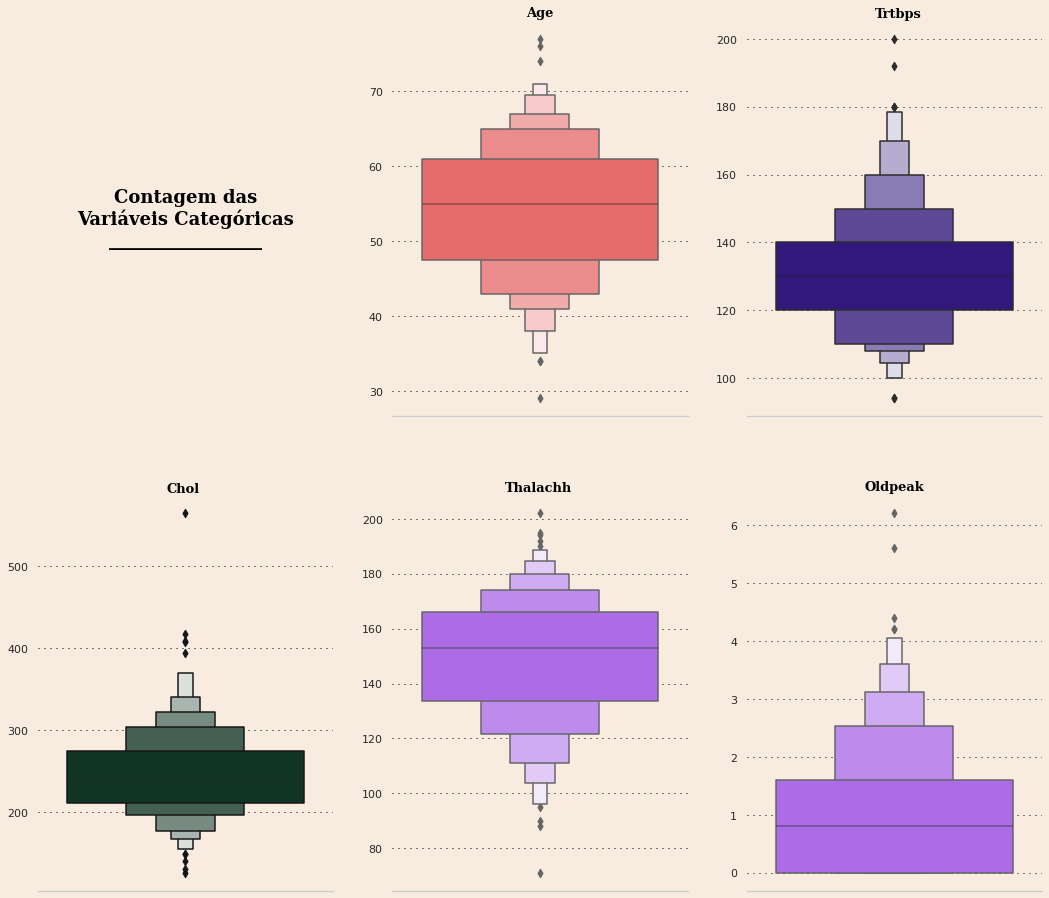

In [332]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]

background_color = '#F8ECE0'
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 

ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Contagem das\nVariáveis Categóricas\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

ax0.grid()

# Boxen Plot Age
ax1.text(-.047, 80, 'Age', fontsize=13, fontweight='bold', fontfamily='serif', color='#000000')
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1, y=data_heart['age'], palette=['#FA5858'])
ax1.set_xlabel('')
ax1.set_ylabel('')

# Boxen Plot Trtbps
ax2.text(-.065, 206.5, 'Trtbps', fontsize=13, fontweight='bold', fontfamily='serif', color='#000000')
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2, y=data_heart['trtbps'], palette=['#29088A'])
ax2.set_xlabel('')
ax2.set_ylabel('')

# Boxen Plot Chol
ax3.text(-.065, 590, 'Chol', fontsize=13, fontweight='bold', fontfamily='serif', color='#000000')
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3, y=data_heart['chol'], palette=['#0B3B24'])
ax3.set_xlabel('')
ax3.set_ylabel('')

# Boxen Plot Thalachh
ax4.text(-.12, 210, 'Thalachh', fontsize=13, fontweight='bold', fontfamily='serif', color='#000000')
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4, y=data_heart['thalachh'], palette=['#AC58FA'])
ax4.set_xlabel('')
ax4.set_ylabel('')

# Boxen Plot Oldpeak
ax5.text(-.1, 6.6, 'Oldpeak', fontsize=13, fontweight='bold', fontfamily='serif', color='#000000')
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5, y=data_heart['oldpeak'], palette=['#AC58FA'])
ax5.set_xlabel('')
ax5.set_ylabel('')

lista = ["top","right","left"]
ax1.spines[lista].set_visible(False)
ax2.spines[lista].set_visible(False)
ax3.spines[lista].set_visible(False)
ax4.spines[lista].set_visible(False)
ax5.spines[lista].set_visible(False)

fig.savefig('boxen.png', format='png')

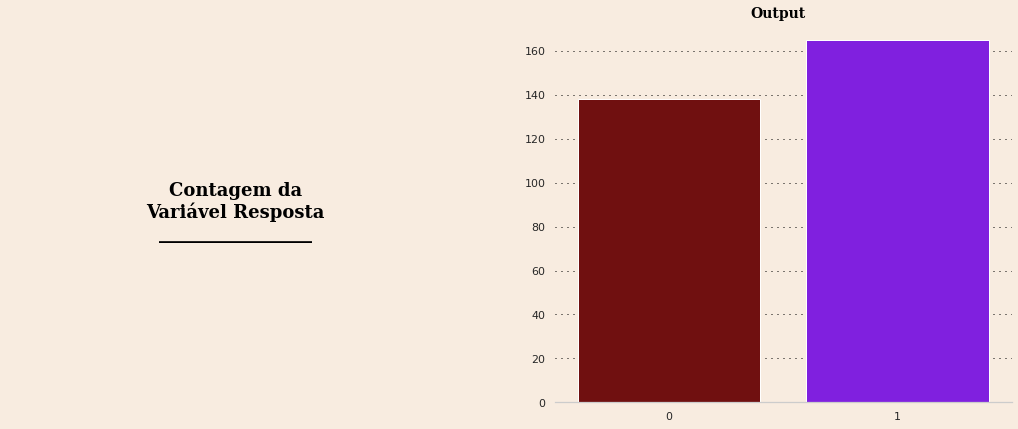

In [350]:
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = '#F8ECE0'
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Contagem da\nVariável Resposta\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

ax0.grid()

# Output count
ax1.text(0.355, 175, 'Output', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=data_heart,x='output',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

lista = ["top","right","left"]
ax1.spines[lista].set_visible(False)

### 3.2 Bivariate Analysis <a id=10></a>

#### 3.2.1 Criando matrix de correlações das variáveis

In [353]:
data_corr = data_heart[con_col].corr()
data_corr

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


<AxesSubplot:>

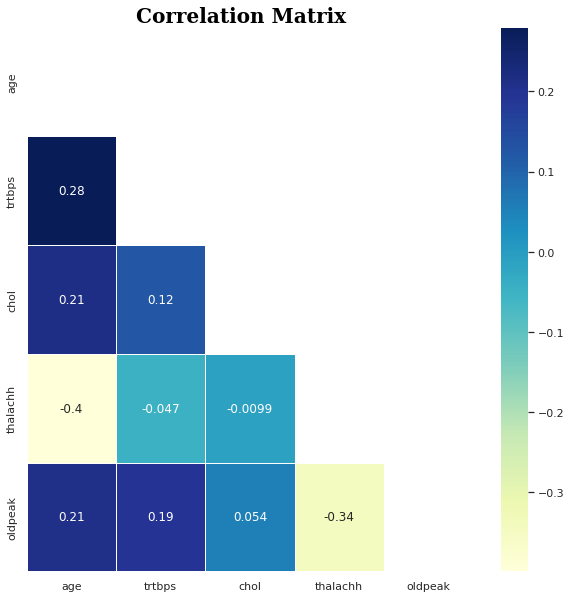

In [434]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(data_corr))
ax0.text(1.225,-0.05, 'Correlation Matrix', fontsize=20, fontweight='bold', fontfamily='serif', color='#000000')
sns.heatmap(data_corr,mask=mask, annot=True, linewidths=.5, cmap='YlGnBu')


### 3.2.3 Distribuição das Variáveis Contínuas de acordo com a Variável Reposta

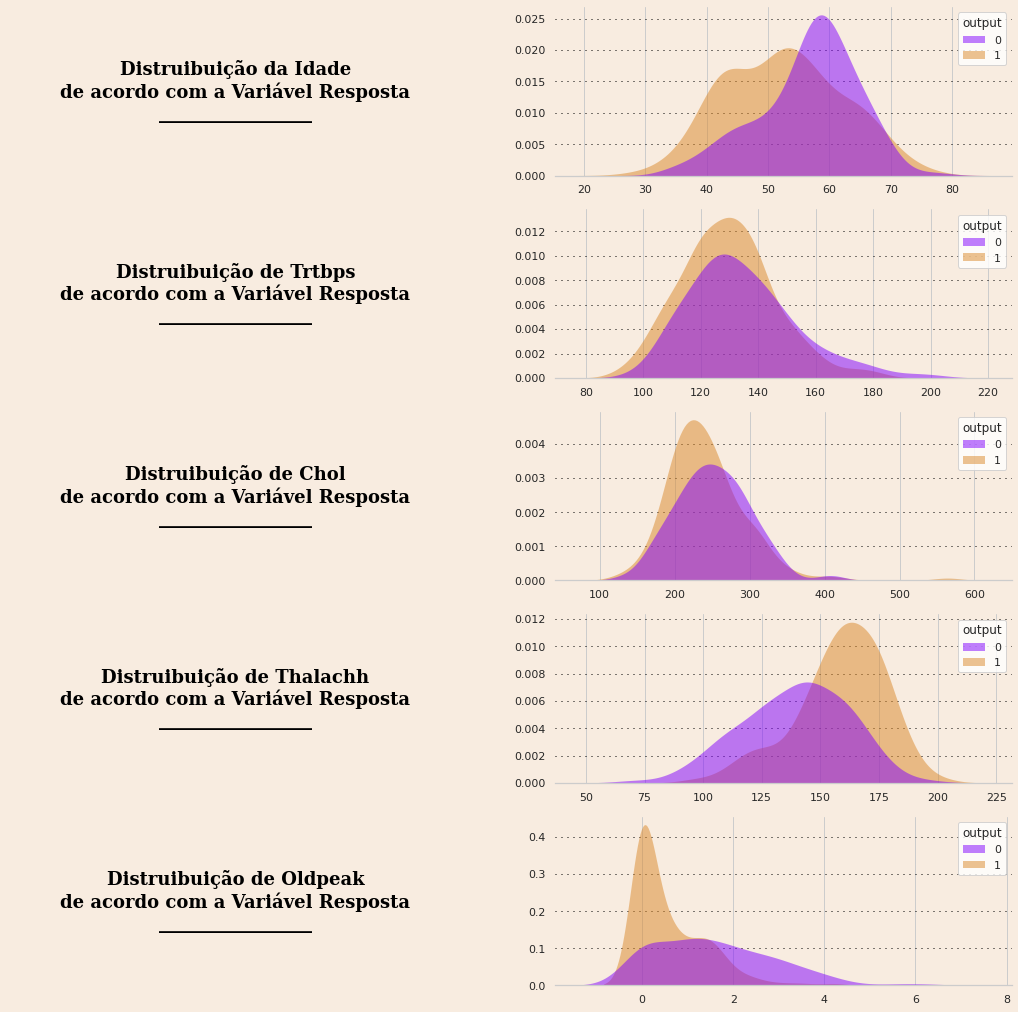

In [448]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

background_color = '#F8ECE0'
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color) 
ax9.set_facecolor(background_color)


ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Distruibuição da Idade\nde acordo com a Variável Resposta\n_________________',~
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

ax0.grid()

# Distrubuição Variável Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=data_heart, x='age',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

#---------------------------------------------------------
ax2.spines["bottom"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.tick_params(left=False, bottom=False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.text(0.5,0.5,
         'Distruibuição de Trtbps\nde acordo com a Variável Resposta\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

ax2.grid()

# Distruibuição Variável Trtbps
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=data_heart, x='trtbps',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

#---------------------------------------------------------
ax4.spines["bottom"].set_visible(False)
ax4.spines["left"].set_visible(False)
ax4.spines["top"].set_visible(False)
ax4.spines["right"].set_visible(False)
ax4.tick_params(left=False, bottom=False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.text(0.5,0.5,
         'Distruibuição de Chol\nde acordo com a Variável Resposta\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

ax4.grid()

# Distruibuição Variável Chol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=data_heart, x='chol',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

#---------------------------------------------------------
ax6.spines["bottom"].set_visible(False)
ax6.spines["left"].set_visible(False)
ax6.spines["top"].set_visible(False)
ax6.spines["right"].set_visible(False)
ax6.tick_params(left=False, bottom=False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.text(0.5,0.5,
         'Distruibuição de Thalachh\nde acordo com a Variável Resposta\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

ax6.grid()

# Distruibuição Variável Thalachh
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=data_heart, x='thalachh',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

#---------------------------------------------------------
ax8.spines["bottom"].set_visible(False)
ax8.spines["left"].set_visible(False)
ax8.spines["top"].set_visible(False)
ax8.spines["right"].set_visible(False)
ax8.tick_params(left=False, bottom=False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.text(0.5,0.5,
         'Distruibuição de Oldpeak\nde acordo com a Variável Resposta\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

ax8.grid()

# Distruibuição Variável Oldpeak
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=data_heart, x='oldpeak',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

lista = ["top","left","right"]
ax0.spines[lista].set_visible(False)
ax1.spines[lista].set_visible(False)
ax2.spines[lista].set_visible(False)
ax3.spines[lista].set_visible(False)
ax4.spines[lista].set_visible(False)
ax5.spines[lista].set_visible(False)
ax6.spines[lista].set_visible(False)
ax7.spines[lista].set_visible(False)
ax8.spines[lista].set_visible(False)
ax9.spines[lista].set_visible(False)

### 3.2.4 Relações que podem trazer esclarecimento

Text(0, 0.5, '')

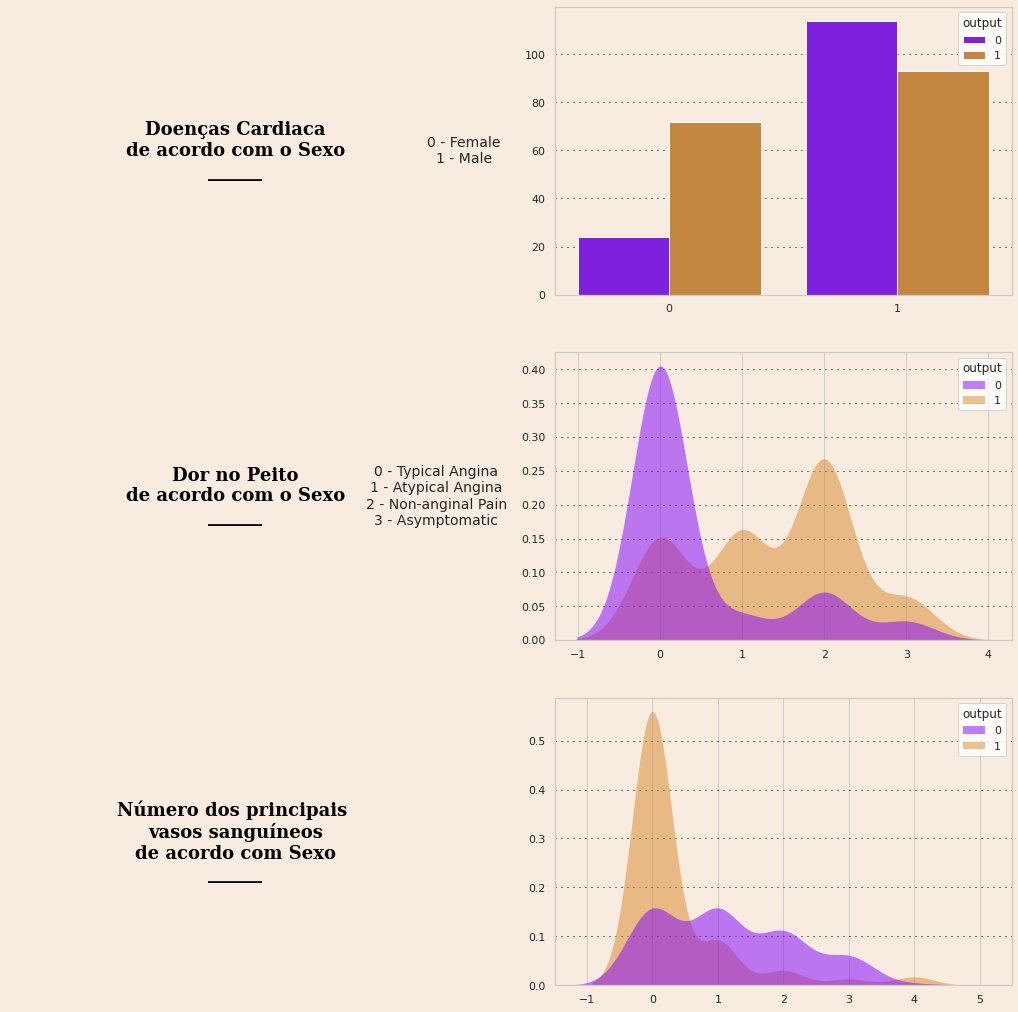

In [475]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(3,2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])


background_color = '#F8ECE0'
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 


ax0.text(0.5,0.5,
         "Doenças Cardiaca\nde acordo com o Sexo\n______",
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")
ax0.text(1,.5,"0 - Female\n1 - Male",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.grid()


# Variável Sexo

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=data_heart,x='sex',palette=["#8000ff","#da8829"], hue='output')
ax1.set_xlabel("")
ax1.set_ylabel("")

#---------------------------------------------------------------

ax2.text(0.5,0.5,
         "Dor no Peito\nde acordo com o Sexo\n______",
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")
ax2.text(0.94,.5,"0 - Typical Angina\n1 - Atypical Angina\n2 - Non-anginal Pain\n3 - Asymptomatic",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax2.spines["bottom"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)
ax2.grid()


# Variável Cp

ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=data_heart, x='cp',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

#---------------------------------------------------------
ax4.text(0.5,0.5,
         "Número dos principais \nvasos sanguíneos\nde acordo com Sexo\n______",
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

ax4.spines["bottom"].set_visible(False)
ax4.spines["left"].set_visible(False)
ax4.spines["top"].set_visible(False)
ax4.spines["right"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)
ax4.grid()

# Variável Caa

ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=data_heart, x='caa',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")




#### 3.2.5 Pairplot de acordo com a Variável Resposta

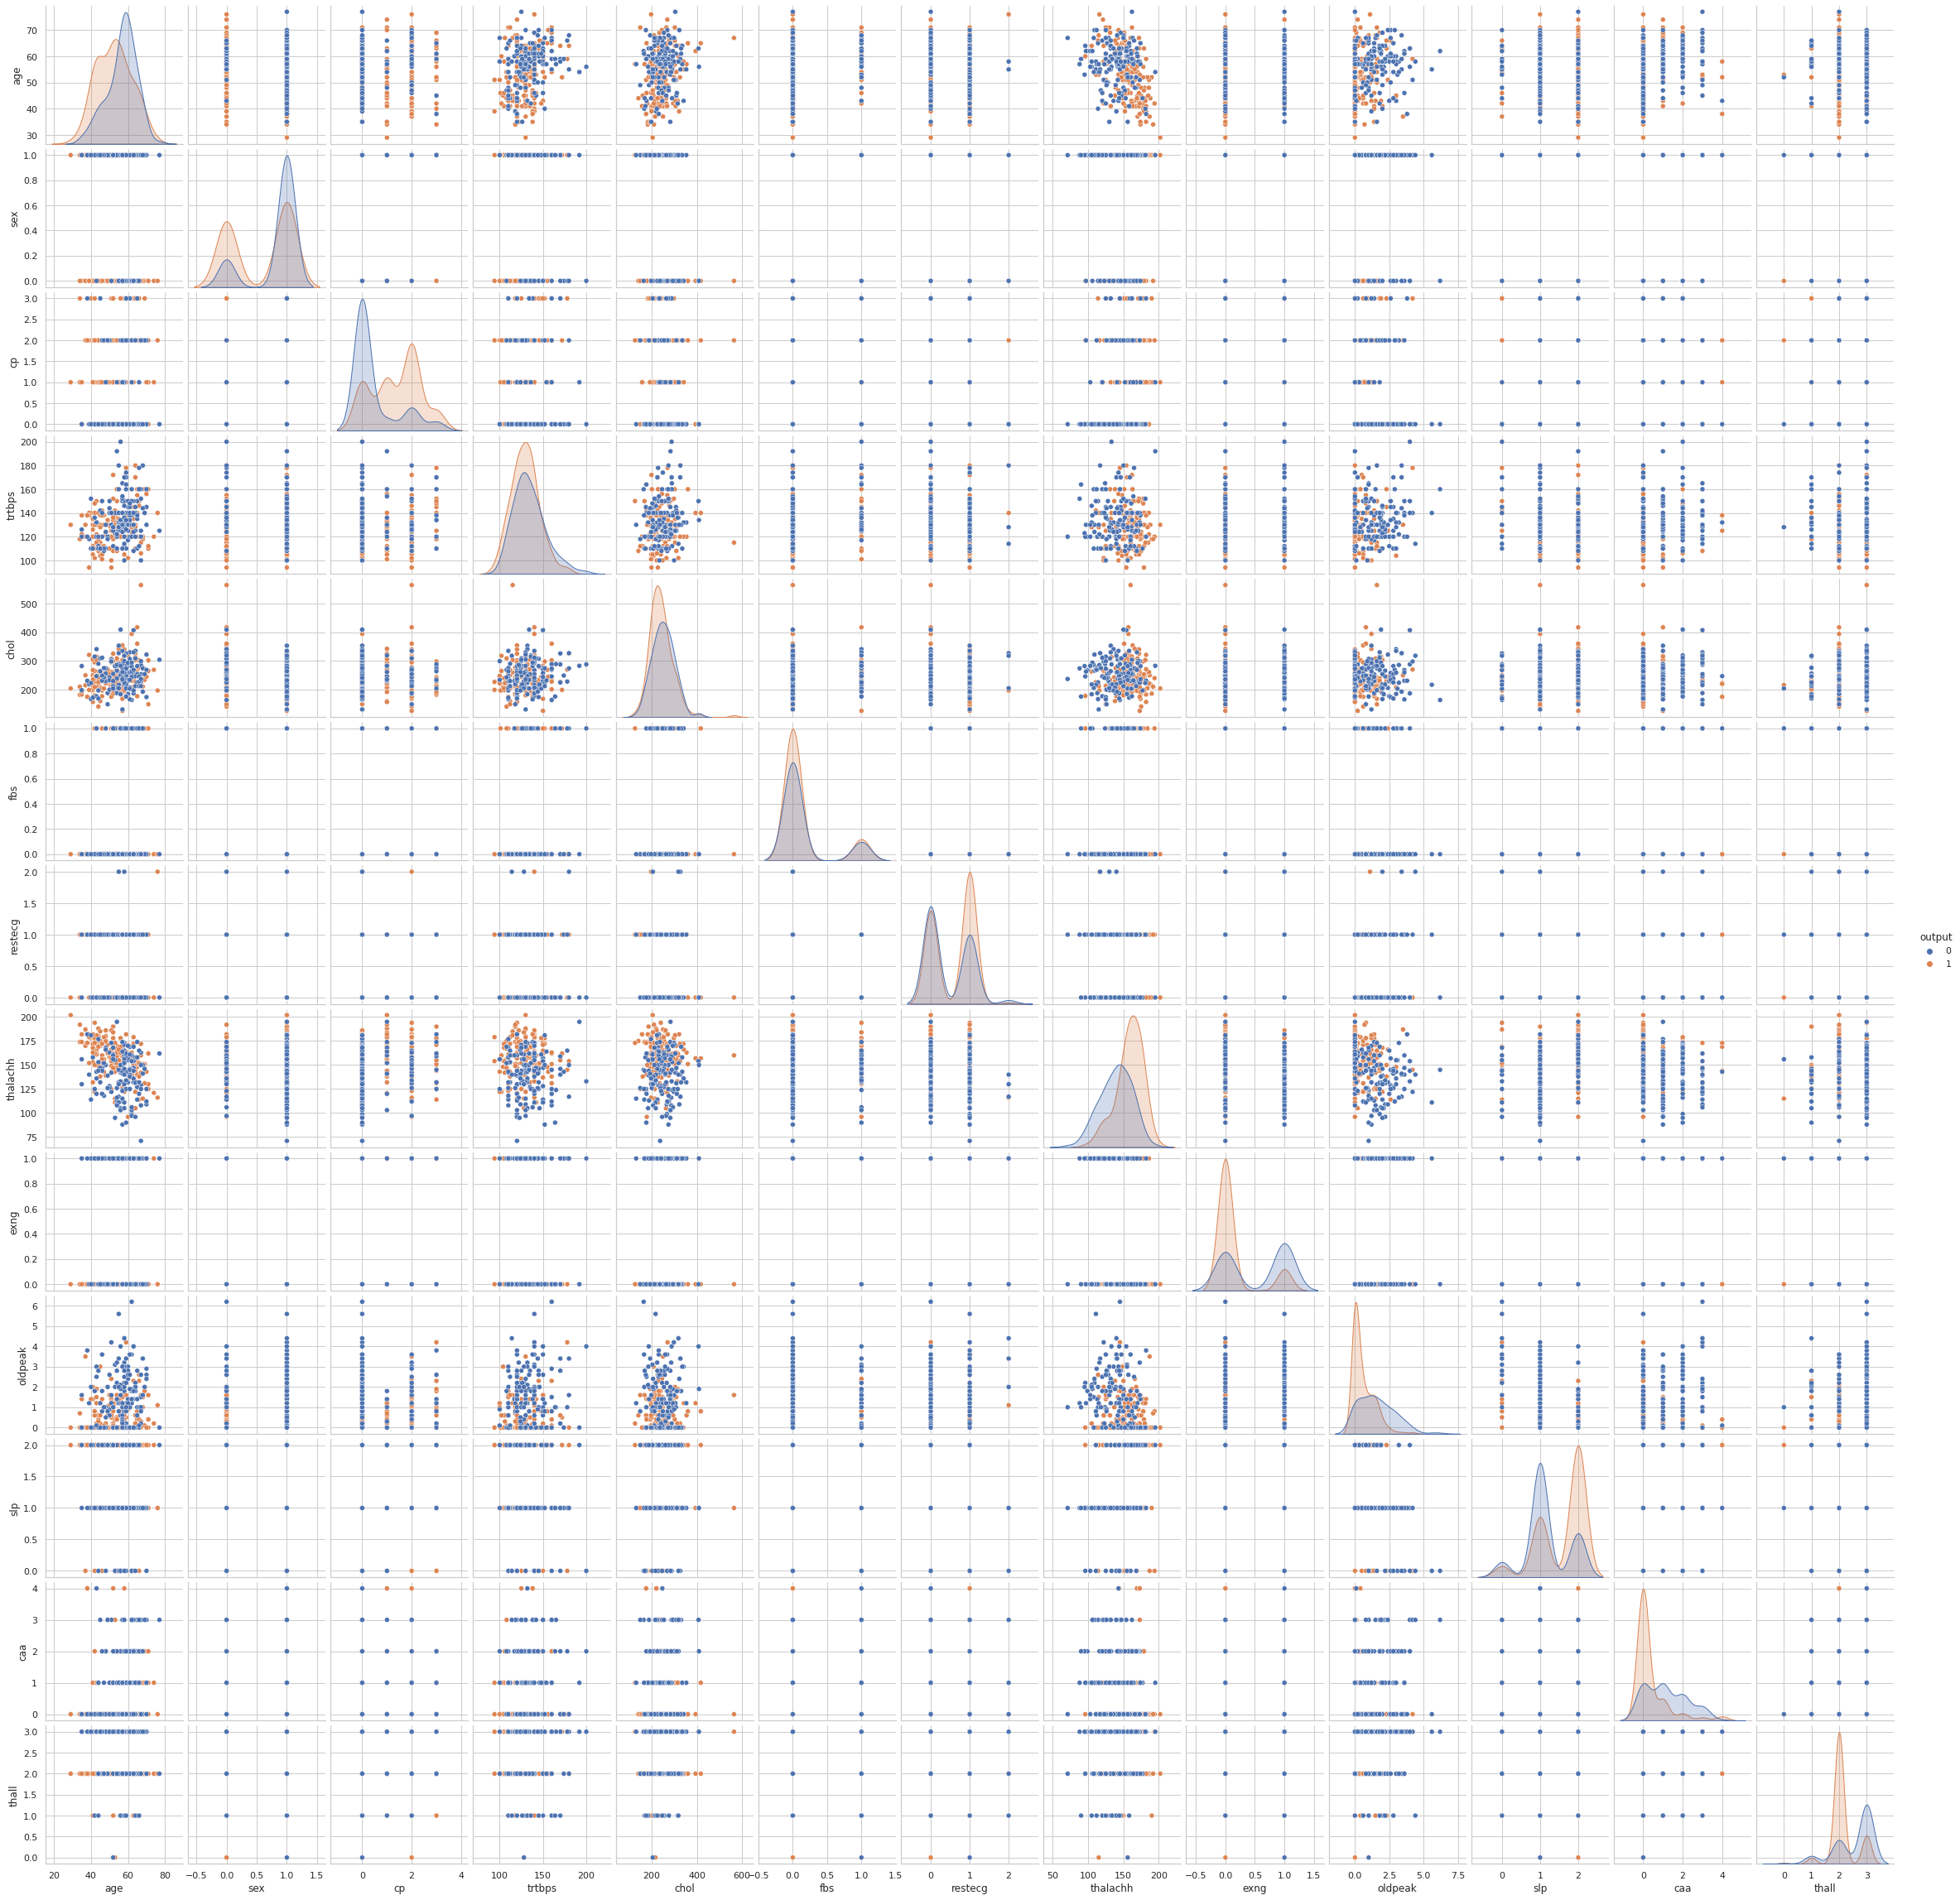

In [472]:
sns.pairplot(data_heart, hue='output')

## 4. Conclusões da Análise Exploratória <a id=11></a>
[back to top](#18)

1. Não existem valores Nulos no dataset.
2. Existem poucos outliers, o mais discrepante é na variável `chol` onde assume valores maiores que `500`, sendo o normal na faixa de `210` a `250`.
3. A maioria das pessoas no dataset, são do sexo Masculino, `sex = 1`, logo os que mais tem doenças cardiovasculares são Homens, o que apenas reflete a maioridade dos dados.
4. Existe a premissa dos mais velhos sofreram mais com doenças cardiovasculares, porém na análise feita os mais velhos que dominam a maioria dos dados, não são os que mais sofrem, o pico é na faixa dos `45` a `55` anos.
5. O que já era previsto, quanto maior a frequência cardíaca maxima, maior o risco de se ter uma doença cardiovascular. O pico é por volta de `thalachh = 165`.
6. O pico anterior, quando a variável `oldpeak = 0`, tem uma forte chance de sofrer uma doença cardíaca.
7. Outra variável importante a ser avaliada é a `caa`, que é o número dos principais vasos sanguíneos, quando `caa = 0` forte chance de sofrer um ataque cardiovascular. 
8. Na variável `cp` que classifica Dores no Peito, onde o melhor indíce é `cp = 0` (Typical Angina), e o mais letal é o `cp = 2`, aumentando muito o risco de uma doença cardíaca.
9. O colesterol tem um forte pico de casos com doenças cardiovasculares abaixo do pico das pessoas que não sofreram com a doença. O pico dos que sofreram fica por volta de `chol = 230` e o dos que não sofreram por volta de `chol = 255`.